In [1]:
import json
import numpy as np
from tabulate import tabulate
from matplotlib import pyplot as plt 
import random

In [2]:
file = open('report_list.json')

In [3]:
data = json.load(file)

In [4]:
results = {}

In [5]:
for d in data:
    try:
        results[d['id']]['raw'].append(float(d['execution_time']))
    except:
        results[d['id']] = {}
        results[d['id']]['raw'] = [float(d['execution_time'])]

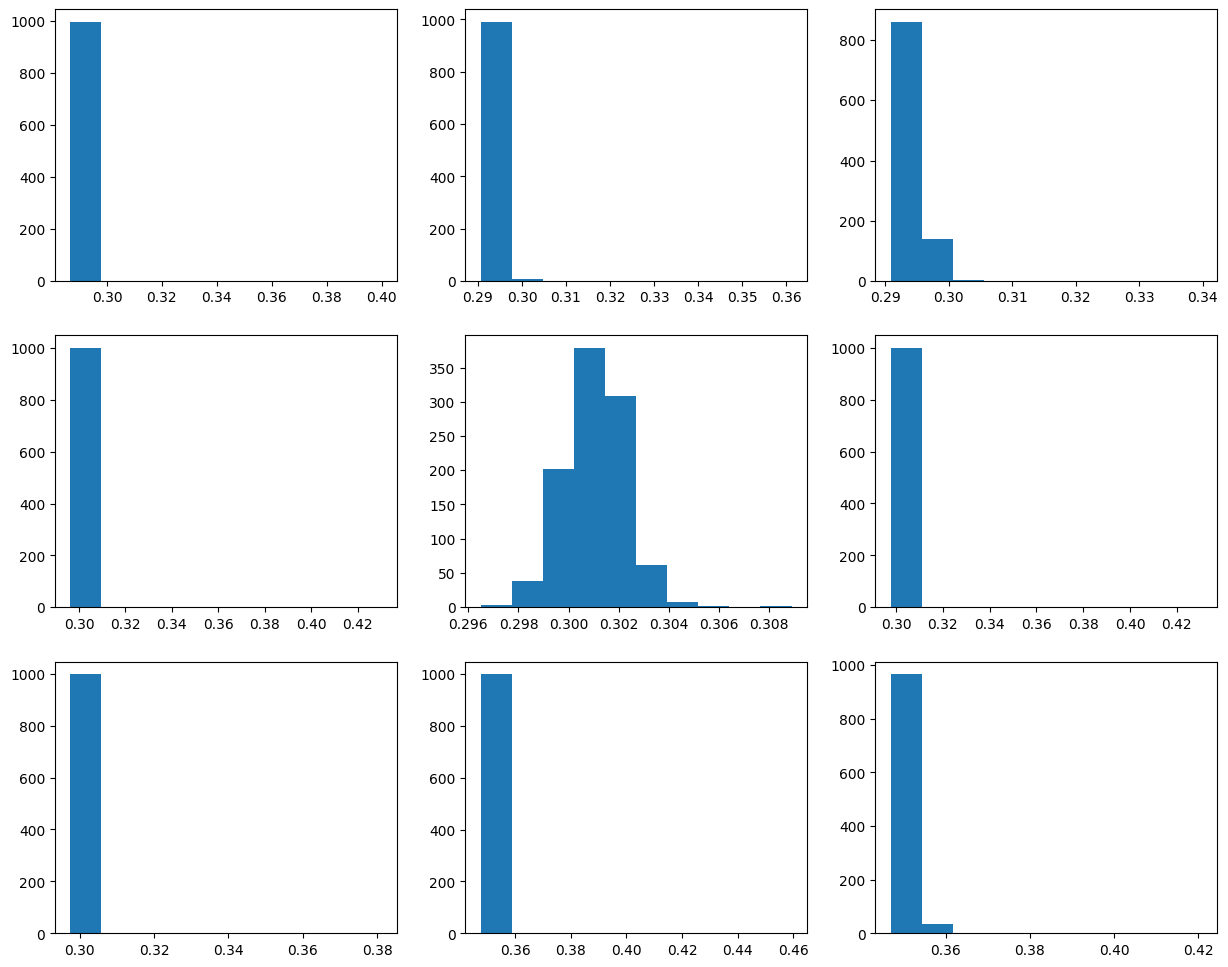

In [6]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for student_id, ax in zip(random.sample(list(results.keys()),9), axs.ravel()):
    ax.hist(results[student_id]['raw']);

In [7]:
for s in list(results.keys()):
    results[s]['mean'] = np.mean(results[s]['raw'])
    results[s]['std'] = np.std(results[s]['raw'])

In [8]:
student_ids = list(results.keys())
student_means = []
student_stds = []
for s in student_ids:
    student_means.append(results[s]['mean'])
    student_stds.append(results[s]['std'])

In [9]:
idx_ranks = np.argsort(np.array(student_means))

In [10]:
table = [[student_ids[r],student_means[r],student_stds[r]] for r in idx_ranks] 
table.insert(0,['Student ID', 'Avg. Exec. Time (s)', 'Std. Deviation (s)'])

In [11]:
print(tabulate(table))

----------  -------------------  ---------------------
Student ID  Avg. Exec. Time (s)  Std. Deviation (s)
2602118484  0.29165654799999996  0.0035639247051103633
2602185431  0.29170843100000005  0.004032689338300062
2602158235  0.29454276700000004  0.002835147023826278
2602158191  0.294558652          0.0019290549190979507
2602158626  0.294633778          0.002470189009917257
2602119096  0.296728137          0.0018980525488592253
2602118894  0.29697220900000004  0.005049767014558097
2602118433  0.297145111          0.0014147381837919697
2602109883  0.30103254199999996  0.0012259481001396428
2602229673  0.30103781           0.0013085702945963586
2602118502  0.301042643          0.0012567283093616538
2602177051  0.301043761          0.0012066912777835932
2602213031  0.30109173999999994  0.001820666413267407
2602118490  0.30111767500000003  0.001702165930623393
2602169850  0.30111836100000006  0.0015429465663719534
2602109870  0.30112925400000007  0.0013110222536189065
2602116983  0.30114

In [12]:
fail_compilation = open('failed_list.json')
print(json.dumps(json.load(fail_compilation), indent=4))

[
    {
        "id": "2602209620",
        "msg": "2602209620/2602209620.c: In function \u2018CLA\u2019:\n2602209620/2602209620.c:25:9: error: \u2018cin\u2019 undeclared (first use in this function); did you mean \u2018Cin\u2019?\n   25 |         cin = calcCout(c[i-1], d[i-1], Cin);\n      |         ^~~\n      |         Cin\n2602209620/2602209620.c:25:9: note: each undeclared identifier is reported only once for each function it appears in\n"
    },
    {
        "id": "2602119190",
        "msg": "m2602119190.c: In function \u2018main\u2019:\nm2602119190.c:52:21: warning: implicit declaration of function \u2018CLA\u2019 [-Wimplicit-function-declaration]\n   52 |                     CLA(operand1,operand2,NUM_BITS,output);\n      |                     ^~~\nm2602119190.c:74:82: warning: \u2018%s\u2019 directive writing up to 79 bytes into a region of size between 30 and 35 [-Wformat-overflow=]\n   74 |     sprintf(outputStr, \"{ \\\"id\\\": \\\"%s\\\", \\\"execution_time\\\": \\\"%f\\\"